In [1]:
# dbscan
### The Data
Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\Wholesale customers data.csv')

In [4]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [5]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
df.shape

(440, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [9]:
df_null = round(100 * df.isna().sum()/len(df),2)
df_null

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

In [10]:
plt.style.use(['science','notebook','grid'])

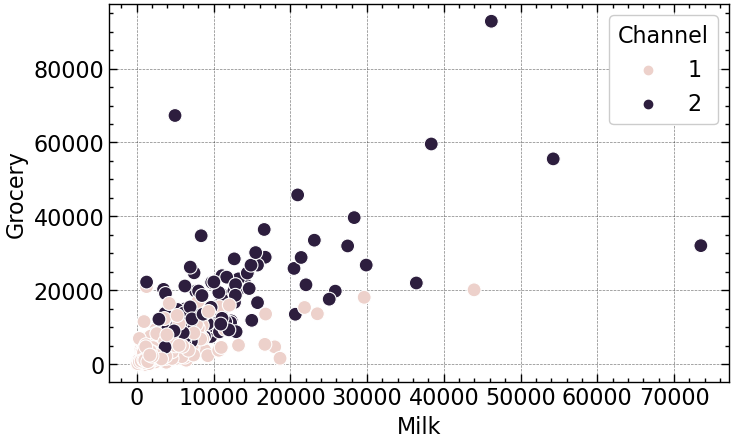

In [11]:
plt.figure(figsize=(8,5), dpi =100)
sns.scatterplot(x='Milk', y='Grocery', hue='Channel', data=df, s=100);

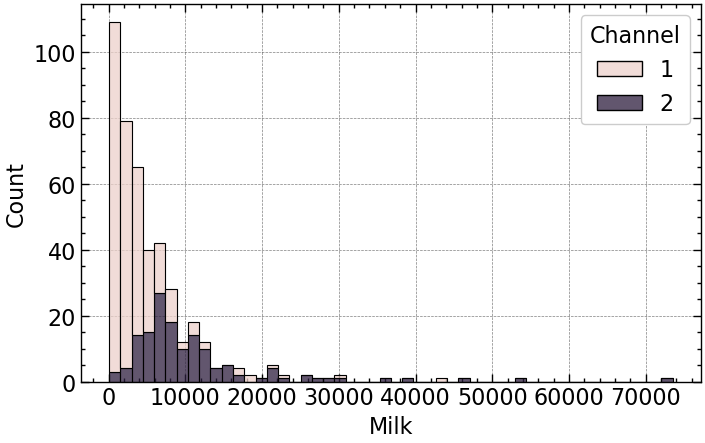

In [12]:
plt.figure(figsize=(8,5), dpi=100)
sns.histplot(x='Milk', hue='Channel', multiple='stack',data=df);

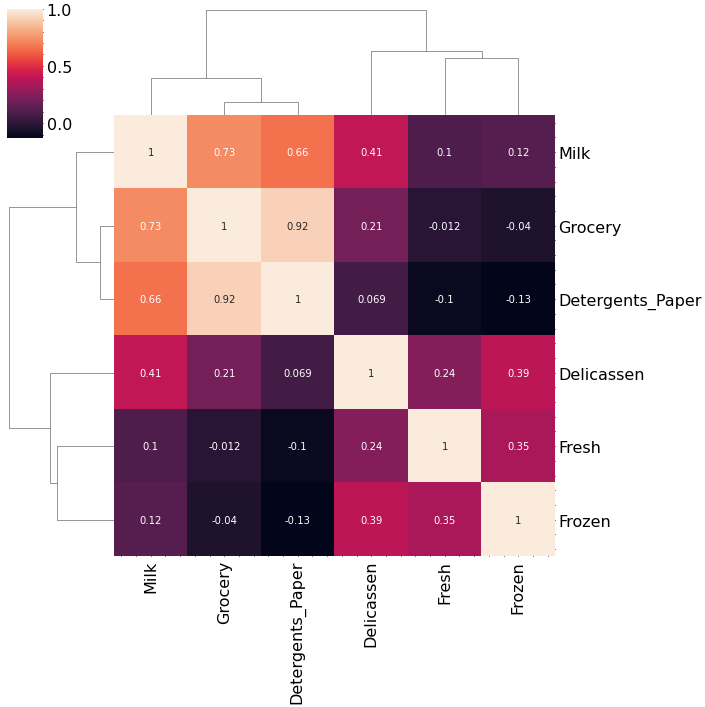

In [13]:
sns.clustermap(df.drop(['Channel','Region'],axis=1).corr(), annot=True);

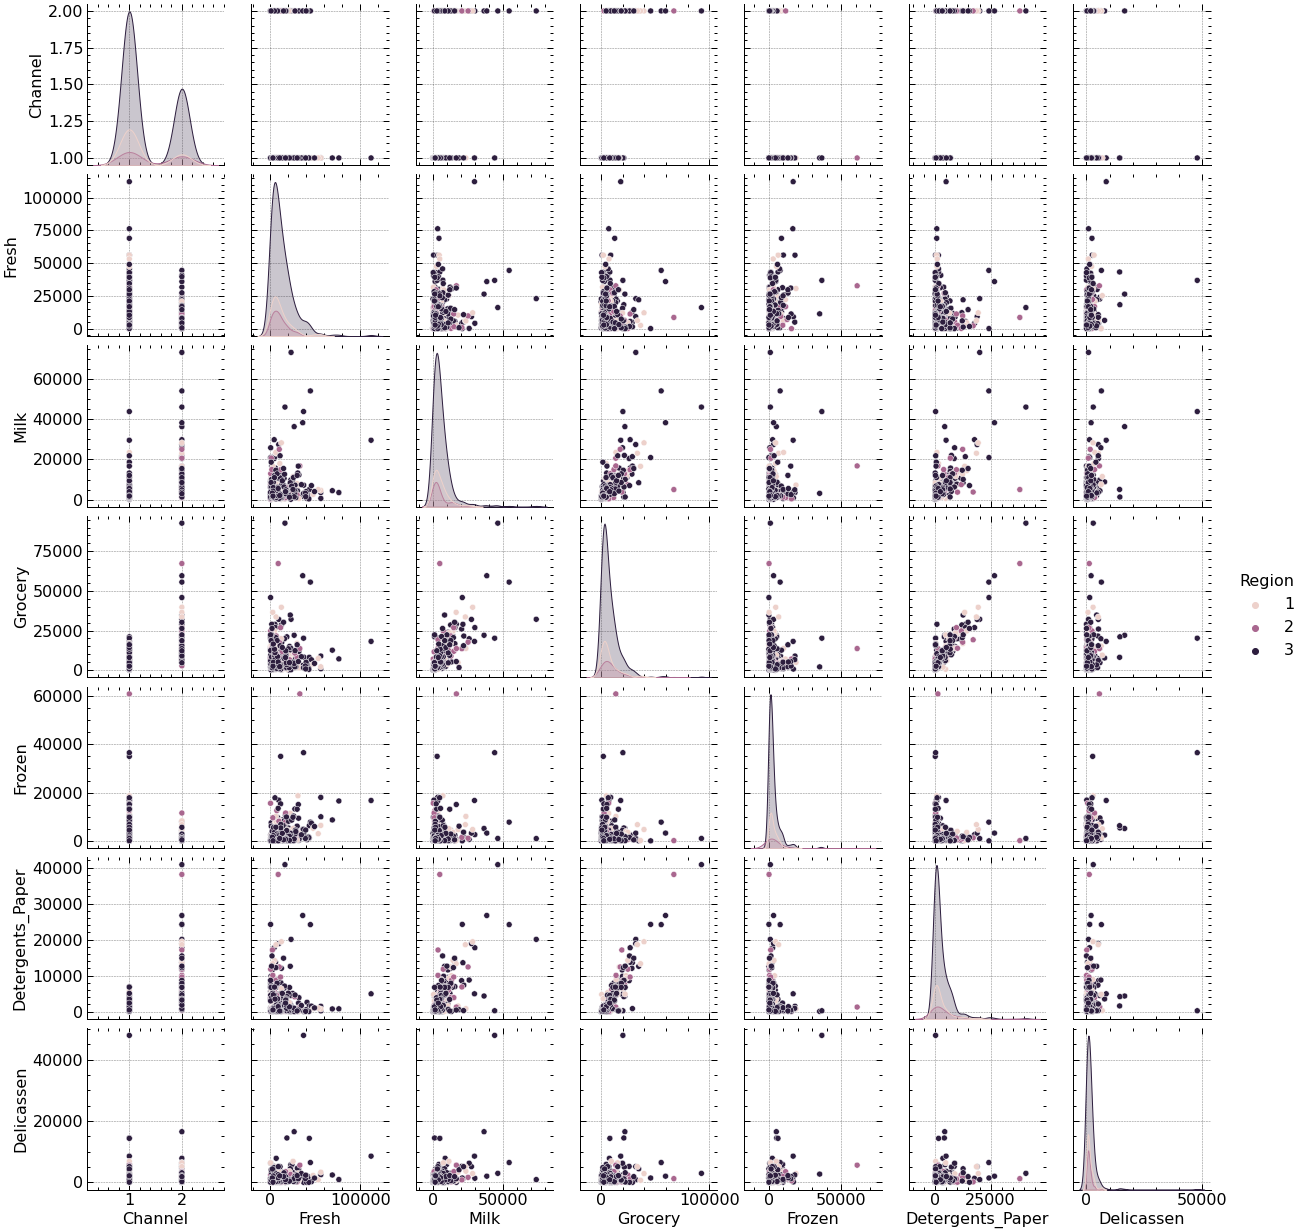

In [14]:
sns.pairplot(df, hue='Region')

In [15]:
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']] 

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
minmax = MinMaxScaler()

In [18]:
X_minmax= minmax.fit_transform(X)

In [19]:
X_minmax

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

## MODEL DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn import metrics

* **Silhouette score** digunakan untuk mengevaluasi kualitas cluster yang dibuat menggunakan algoritma clustering, diambil 
berdasarkan nilai tertingi

## $\text{Silhouette score =} \frac{p-q}{max(p,q)}$


In [21]:
S = [] # nilai kosong silhouette score
comb = [] # nilai kombinasi epsilon dengan min samples

range_eps = range(4,14) # nilai range di bagi 100 
range_sampt = range(3,8) # nilai min samples

for e in range_eps:
    for m in range_sampt:
        # model dbscan
        dbscan = DBSCAN(eps = e/100, min_samples=m)
        dbscan = dbscan.fit(X_minmax)
        cluster_label = dbscan.labels_
        
        #silhouette score
        S.append(silhouette_score(X_minmax,  cluster_label, metric= 'euclidean'))
        # eps dan min sample
        comb.append(str(e)+'|'+str(m))

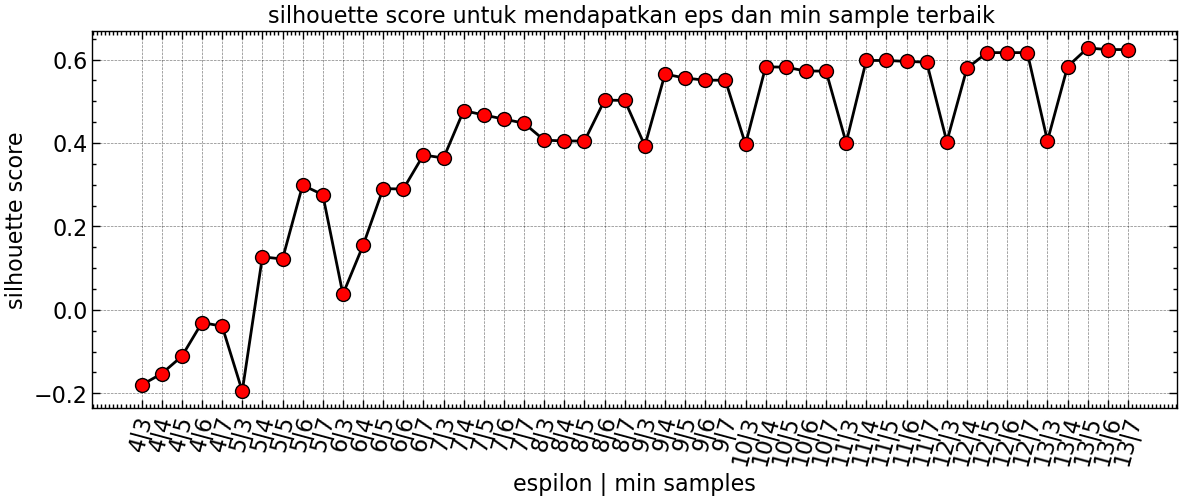

In [22]:
plt.figure(figsize=(14,5), dpi=100)
plt.plot(comb, S, 'o-', color='black', markerfacecolor='red', markersize=10)
plt.xticks(rotation=75)
plt.title('silhouette score untuk mendapatkan eps dan min sample terbaik ')
plt.xlabel('espilon | min samples')
plt.ylabel('silhouette score')
plt.show()

* Hasil perhitungan **silhouette score** tertinggi berada pada (13|5) epsilon 13 dan min samples 5

## Final Model

In [23]:
model135 = DBSCAN(eps= 13/100, min_samples= 5)

In [24]:
dbscan = model135.fit(X_minmax)

In [25]:
cluster_label = dbscan.labels_ 

In [26]:
cluster_label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [27]:
np.unique(cluster_label)

array([-1,  0], dtype=int64)

In [28]:
labels = cluster_label
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{-1: 31, 0: 409}

In [29]:
df['dbscan model 135'] = cluster_label

In [30]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  dbscan model 135  
0        1338                 0  
1        1776                 0  
2        7844                 0  
3        1788                 0  
4        5185                 0

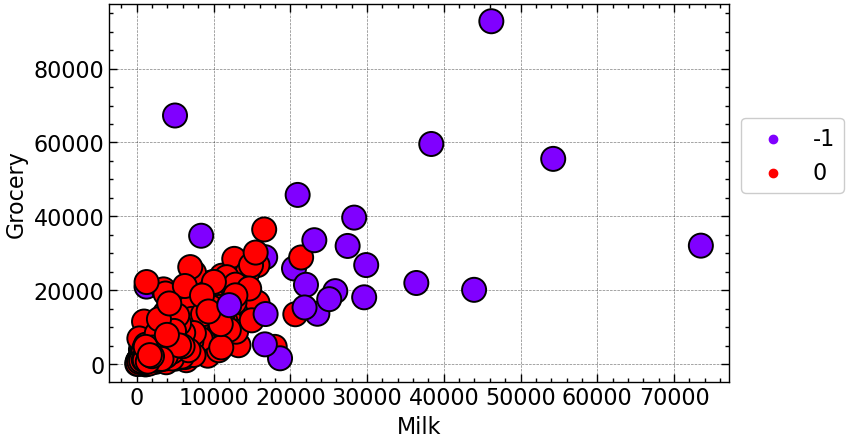

In [31]:
plt.figure(figsize=(8,5), dpi=100)
sns.scatterplot(x='Milk', y='Grocery', hue='dbscan model 135', data=df, palette='rainbow', s=300, ec='black');
plt.legend(loc=(1.02, 0.5))
plt.show()

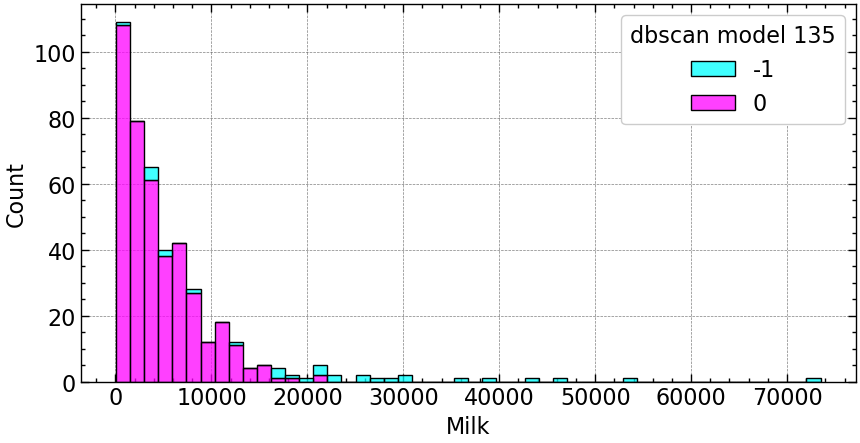

In [32]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(x='Milk', hue='dbscan model 135', data=df, multiple='stack', palette='cool');

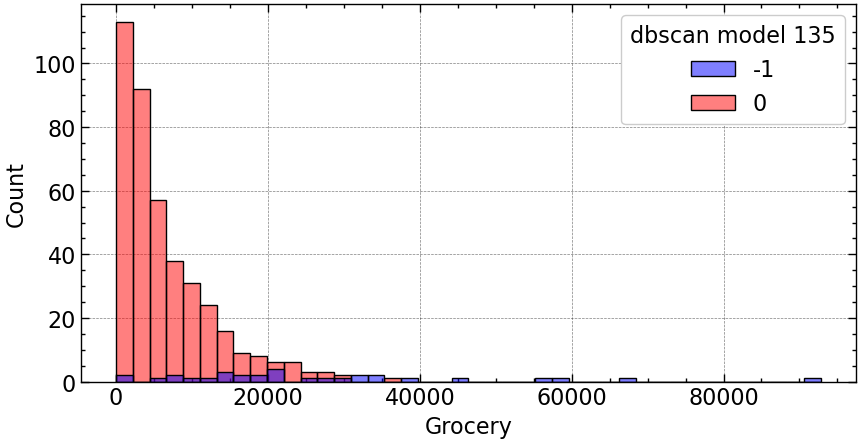

In [33]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(x='Grocery', hue='dbscan model 135', data=df, palette='bwr');

In [34]:
import plotly.express as px
import plotly.graph_objects as go

In [35]:
# Sort the dataframe so clusters in the legend follow the number order
df=df.sort_values(by=['dbscan model 135'])

# Create a 3D scatter plot
fig = px.scatter_3d(df, x=df['Milk'], y=df['Grocery'], z=df['Channel'], 
                    opacity=1, color=df['dbscan model 135'].astype(str), 
                    color_discrete_sequence=['black']+px.colors.qualitative.Plotly,
                    hover_data=['Region','Fresh','Frozen','Detergents_Paper','Delicassen'],
                    width=500, height=500
                   )

# Update chart looks
fig.update_layout(title_text='dbscan model 135',
                  showlegend=True,
    
                  legend=dict(orientation="h", yanchor="bottom", y=0.05, xanchor="left", x=0.1),
    
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
    
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         ),
                               
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          ),
                               
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                         )))
# Update marker size
fig.update_traces(marker=dict(size=5))

fig.show()

In [36]:
fig.show(render='chrome')

In [37]:
import plotly.io as pio

In [38]:
pio.write_html(fig, file='index.html', auto_open=True)

* Untuk melihat plotly 3D hasil dbscan model 135 klik link : https://yoppiibra.github.io/plotly_dbscan135/

In [39]:
df.groupby('dbscan model 135').mean().drop(['Channel','Region'], axis=1)

Fresh          Milk       Grocery       Frozen  \
dbscan model 135                                                          
-1                24601.322581  22774.161290  26455.225806  9461.709677   
 0                11045.207824   4509.432763   6548.777506  2587.621027   

                  Detergents_Paper   Delicassen  
dbscan model 135                                 
-1                    10361.741935  5939.290323  
 0                     2314.530562  1190.281174

In [40]:
dict(zip(unique,counts))

{-1: 31, 0: 409}

In [41]:
409/len(df)

0.9295454545454546

In [42]:
31/len(df)

0.07045454545454545

**Kesimpulan** :
    
  * cluster 0 sebanyak 92% merupakan konsumen dengan karakteristik sering berbelanja namun untuk jumlah pengelurannya
    terbatas
    
  * cluster -1 sebanyak 0.07% merupakan konsumen yang jarang melakukan belanja tetapi nilai uang yang habiskan cukup
  besar dan siknifikan